# Part II - Factors Affecting the Borrowers APR
## by Joseph Eze

## Investigation Overview


> I want to investigate variables that affect the borrowers interest annual rate (%), variables of interest are the Occupation, EmploymentStatus, LoanStatus, IncomeRange, ProperRating (Alpha), StatedMonthlyIncome and the MonthlyLoanPayment.


## Dataset Overview

> This is a data set from Prosper, which is America’s first marketplace lending platform, with over $9 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1664476892038604&usg=AOvVaw23bRBXJmLEVfbf8F03sdvo) explains the variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pld = pd.read_csv('prosperLoanData.csv')

# convert CreditGrade, LoanStatus, EmploymentStatus  into ordered categorical types
ordinal_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', 
                                '$100,000+', 'Not displayed', 'Not employed']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_dict[var])
    pld[var] = pld[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower APR

> The Borrower APR plot is multi-modal with the first peak before 0.1% and the highest peak around 0.3% and 0.37%

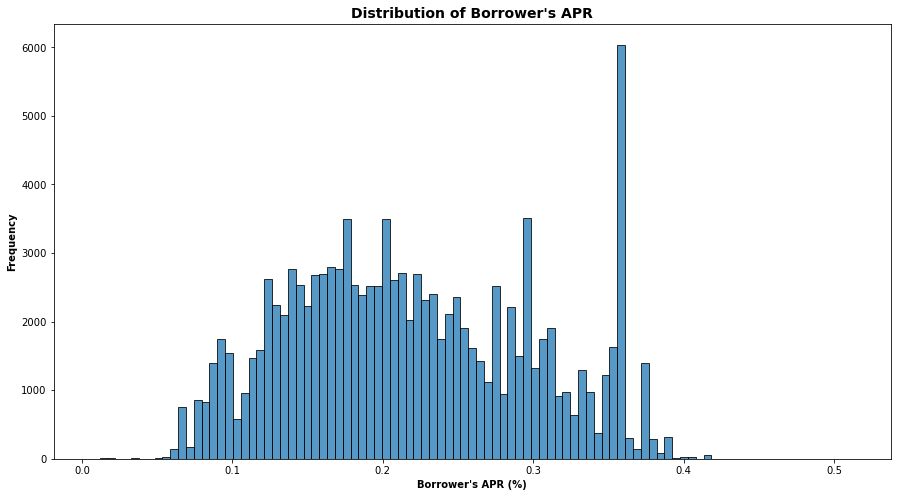

In [3]:
plt.figure(figsize = [15, 8]) 
base_color = sb.color_palette()[0]

sb.histplot(pld['BorrowerAPR'], color = base_color)
plt.xlabel("Borrower's APR (%)", fontsize = 10, weight = 'bold');
plt.ylabel('Frequency', fontsize = 10, weight = 'bold')
plt.title("Distribution of Borrower's APR", fontsize = 14, weight = 'bold');

## Distribution of Prosper Rating (Alpha)

> We can see that most of the loan post July 2009 has the credit rating of C, with the B ratings following behind. 

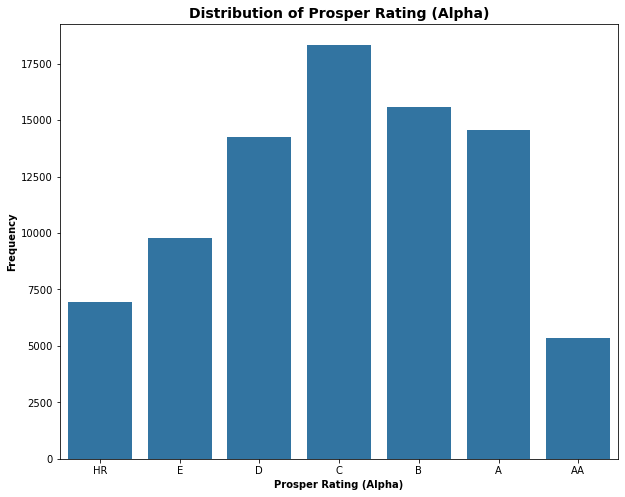

In [4]:
plt.figure(figsize= (10,8))
base_color = sb.color_palette()[0]
sb.countplot(data = pld, x = 'ProsperRating (Alpha)', color = base_color)
plt.xlabel("Prosper Rating (Alpha)", fontsize = 10, weight = 'bold');
plt.ylabel('Frequency', fontsize = 10, weight = 'bold')
plt.title("Distribution of Prosper Rating (Alpha)", fontsize = 14, weight = 'bold');

## Distribution of Occupation

>We can see Others with no specific occupation took more loan, followed closely by the professionals, Computer programmers and Executives followed behind, with the least from the Student-Technical School occupation.

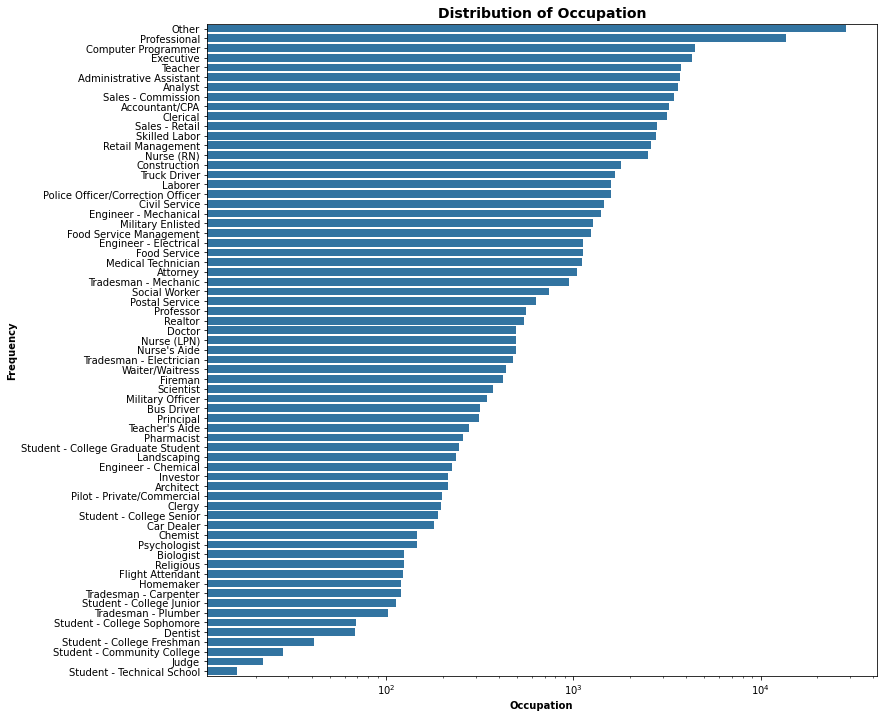

In [5]:
plt.figure(figsize = [12, 12])
occ_order = pld.Occupation.value_counts().index

base_color = sb.color_palette()[0]
sb.countplot(data = pld, y = 'Occupation', color = base_color, order = occ_order)
plt.xscale('log')

plt.xlabel("Occupation", fontsize = 10, weight = 'bold');
plt.ylabel('Frequency', fontsize = 10, weight = 'bold')
plt.title("Distribution of Occupation", fontsize = 14, weight = 'bold');

## Relationship between the Numerical Variable of Interest
>We can see a high positive correlation between our variable of interest (BorrowerAPR) with the BorrowerRate and the EstimatedEffectiveYield, another obeservation is the positive correlation between the LoanOriginalAmount and the MonthlyLoanPayment.

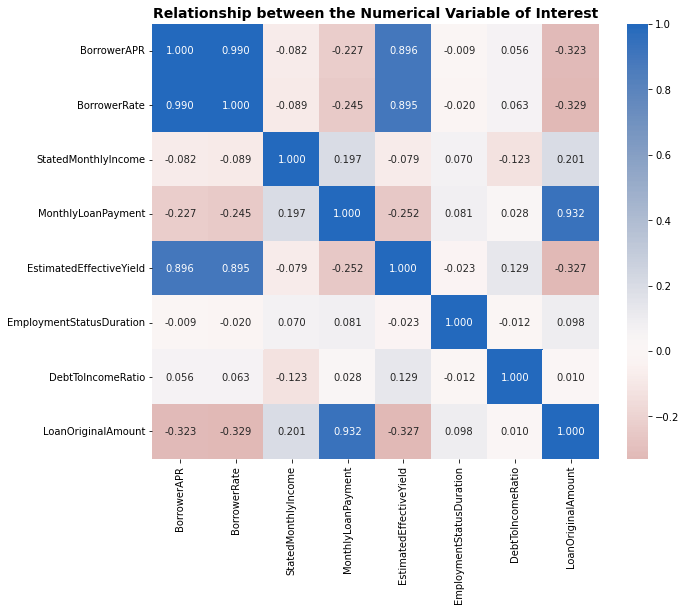

In [6]:
num_vars = ['BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'EstimatedEffectiveYield', 
            'EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount']
plt.figure(figsize = [10, 8])
sb.heatmap(pld[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Relationship between the Numerical Variable of Interest", fontsize = 14, weight = 'bold')
plt.show()

## Relationship between the ProsperRating (Alpha), BorrowerAPR and IncomeRange
>This shows the HR rating has a higher amount of BorrowerAPR, AA rating has the least amount, the plot also show a negative correlation, the higher the ratings, the lower the BorrowerAPR.

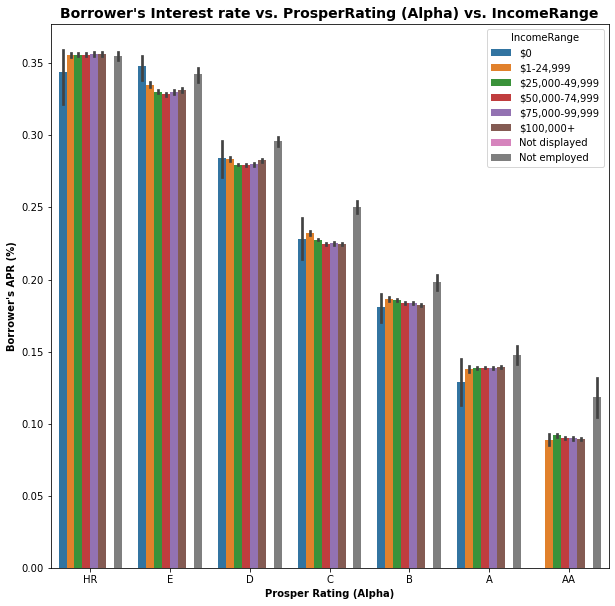

In [7]:
plt.figure(figsize = [10, 10]);
sb.barplot(data = pld, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'IncomeRange')
plt.ylabel("Borrower's APR (%)", fontsize = 10, weight = 'bold')
plt.xlabel("Prosper Rating (Alpha)", fontsize = 10, weight = 'bold')
plt.title('Borrower\'s Interest rate vs. ProsperRating (Alpha) vs. IncomeRange', fontsize = 14, weight = 'bold');

In [9]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 817468 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Joseph\anaconda3\envs\UDA\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Joseph\anaconda3\envs\UDA\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Joseph\anaconda3\envs\UDA\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Joseph\anaconda3\envs\UDA\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Joseph\anaconda3\envs\UDA\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.c